Joshua Boehm</br>
December 1, 2022</br>
Math 3423</br>
Homework 4</br>

# Libraries/Imports

In [2]:
import numpy as np
import scipy as sp
from numpy.linalg import solve
from numpy.linalg import qr
from numpy.linalg import svd
from scipy.linalg import diagsvd
from scipy.linalg import pinv
from scipy.optimize import minimize
from statistics import mean 
import matplotlib.pyplot as plt

# Question 1

Given the data points
$$(2,3), (3,2), (5,1), (6,0)$$
derive the equation of the least-squares line
$$y = mx + b$$
that best fits the given data points. Solve the system using the QR factorization, the SVD, and the Normal Equations.

In [3]:
A = np.matrix([[2,1],[3,1],[5,1],[6,1]])
b = np.matrix([3,2,1,0]).T

## QR Factorization

The matrix created from the data points:
$$\begin{bmatrix}2, 1 \\ 3, 1 \\5, 1 \\6, 1\end{bmatrix}
\begin{bmatrix}m \\ b\end{bmatrix}=\begin{bmatrix}3 \\2 \\1 \\0\end{bmatrix}$$

To solve using $QR$ factorization, we first factor $A$ as $QR$. <br>
Next, we pre-multiply with $Q^T$, giving $Rx=Q^Tb$ ($Q^TQ$ is the identity matrix)<br>
Now, we can call `solve()` with $R$ and $Q^Tb$

In [4]:
Q, R = qr(A)

x = solve(R, Q.T @ b)
print(x)

[[-0.7]
 [ 4.3]]


### Solution

$$x = \begin{bmatrix} -0.7 \\ 4.3 \end{bmatrix}$$

## SVD Factorization

To solve using $SVD$ factorization, we first factor $A$ as $SVD$.    
Now, we create the pseudo-inverse by taking the transpose of the the parts in reverse order, except with $\Sigma$, we take the take the  reciprocals before transposing.    
Last, we can call pre-multiply $b$ with $A^\dagger$, as $A^\dagger A$ is the identity matrix

$$
Ax = b \\
U \Sigma V^T x = b \\
A^\dagger = V \Sigma^\dagger U^T \\
A^TA = I \\
Ix = A^\dagger b \\
x = A^\dagger b \space\space \text{or} \space\space V \Sigma^\dagger U^T b
$$

In [5]:
U, sigma, VT = svd(A)
Sigma = diagsvd(sigma, len(A), len(A.T))
PseudoA = (VT).T @ pinv(Sigma) @ U.T 
print(A @ PseudoA)
print(PseudoA @ A)
x = PseudoA @  b
print(x)

[[ 0.65  0.45  0.05 -0.15]
 [ 0.45  0.35  0.15  0.05]
 [ 0.05  0.15  0.35  0.45]
 [-0.15  0.05  0.45  0.65]]
[[ 1.00000000e+00 -5.55111512e-17]
 [-2.22044605e-15  1.00000000e+00]]
[[-0.7]
 [ 4.3]]


### Solution

$$x = \begin{bmatrix} -0.7 \\ 4.3 \end{bmatrix}$$

## Normal Equations

The normal equation is that which minimizes the sum of the square differences between the left and right sides:<br>
$$
A^TAx = A^Tb
$$

In this case, I would just use `solve(A.T @ A, A.T @ b)` and see. You could utilize QR factorizations (or any other for that matter).

### Solution

In [6]:
solvex = solve(A.T @ A, A.T @ b)
solveqr = solve(R.T @ Q.T @ Q @ R, R.T @ Q.T @ b)
solvesvd = solve(VT.T @ Sigma.T @ U.T @ U @ Sigma @ VT, VT.T @ Sigma.T @ U.T @ b)

print(f"{solvex}\n\n{solveqr}\n\n{solvesvd}")

[[-0.7]
 [ 4.3]]

[[-0.7]
 [ 4.3]]

[[-0.7]
 [ 4.3]]


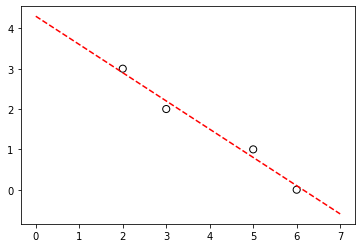

In [7]:
X1 = np.array(A[:,0])
Y1 = np.array(b)
x = np.linspace(0,7,35)
y = (-0.7)*x+(4.3)
plt.scatter(X1,Y1, edgecolor='k',c='none',s=50)
plt.plot(x,y, "r--")

# Question 2

Use functions from `scipy.optimize.minimize` to minimize:<br><br>
The Rosenbrock function
$$
f(x_1,x_2)=(7−x_1)^2 +100(x_2 −x^2_1)^2 +10
$$

## Solution

The Rosenbrock function is defined as:
$$f(x,y)=(a-x)^{2}+b(y-x^{2})^{2} + c$$

In the case of our example, $a = 7$, $b=100$, and $c = 10$.

### Gradiant

In order to derive the gradiant, let's first define it:
$$\nabla f = \begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \\ \vdots\end{bmatrix} \quad \text{OR} \quad \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ \vdots\end{bmatrix}$$

First with regards to $x_1$:

$$\frac{\partial f}{\partial x_1} (7−x_1)^2 +100(x_2 −x^2_1)^2 +10 = 400x_1^3-400x_1x_2 +2x_1-14$$

Next with regards to $x_2$:

$$\frac{\partial f}{\partial x_2} (7−x_1)^2 +100(x_2 −x^2_1)^2 +10 = 200x_2-200x_1^2$$

Thus:

$$\nabla f = \begin{bmatrix} 400x_1^3-400x_1x_2 +2x_1-14 \\ 200x_2-200x_1^2\end{bmatrix}$$

### Hessian

Again, to derive the Hessian, it might help to define it.

$$\bf H_f = 
\begin{bmatrix}
\frac{\partial^2f}{\partial x_1^2} & \frac{\partial^2f}{\partial x_1\partial x_2} \\
\frac{\partial^2f}{\partial x_2\partial x_1} & \frac{\partial^2 f}{\partial x_2^2}
\end{bmatrix}$$

So our second partials are as follows:

\begin{align*}
\frac{\partial^2f}{\partial x_1^2} &= 1200x_1^2-400x_2+2 \\
\frac{\partial^2f}{\partial x_2\partial x_1} &= -400x_1 \\
\frac{\partial^2f}{\partial x_2\partial x_1} &=  -400x_1\\
\frac{\partial^2 f}{\partial x_2^2} &= 200
\end{align*}


This makes the Hessian:
$$
\bf {H}_f = \begin{bmatrix} 1200x_1^2-400x_2+2 &-400x_1 \\ -400x_1 &200\end{bmatrix}
$$

### Definitions

In [8]:
a = 7; b = 100; c = 10
def f(x): 
   return (a - x[0])**2 + b*(x[1] - x[0]**2)**2 + c

def gradient(x):
   return np.array([-2*(a - x[0]) - 4.*b*x[0]*(x[1] - x[0]**2), 
                    2*b*(x[1] - x[0]**2)])

def hessian(x):
   return np.array([[2 - 4*b*x[1] + 12*b*x[0]**2, -4*b*x[0] ], 
                 [-4*b*x[0], 2*b]])

optimization_methods = {'newton-cg':{'function evals': [], 'function iters': []}, 
'nelder-mead':{'function evals': [], 'function iters': []}, 
'powell':{'function evals': [], 'function iters': []},
'bfgs':{'function evals': [], 'function iters': []}, 
'dogleg':{'function evals': [], 'function iters': []}}

starting_points = [np.random.randint(-5,5, size = (1,2)) for i in range(3)]
section_break = "=========================================================="

### Method 1: <span style="color: tan;">Newton-CG</span>

In [9]:
for x in enumerate(starting_points):
    result = minimize(f, x[1], method = 'Newton-CG',jac = gradient, hess = hessian, tol = 1.e-7) 
    
    print(section_break)
    print('Test Run', x[0] + 1, ':')
    print(section_break)

    print('Starting Value Used: ', x[1])
    print("The Minimum Occurs at (x, y) = ", result.x)
    print("The Minimum Value = ", f(result.x).round(3))
    
    print("Other Statistics:") 
    print(result) 
    print(section_break)
    print(section_break)
    print('\n')

   
    optimization_methods['newton-cg']['function evals'].append(result['nfev'])
    optimization_methods['newton-cg']['function iters'].append(result['nit'])
    

# Displaying a summary of both function evaluations and iterations
print(f"\
Summary Statistics of the Method:\n\n\
Function Evaluations:\n\
Minimum Function Evaluations: {min(optimization_methods['newton-cg']['function evals'])}\n\
Maximum Function Evaluations: {max(optimization_methods['newton-cg']['function evals'])}\n\
Mean Function Evaluations: {mean(optimization_methods['newton-cg']['function evals'])}\n\n\
Function Iterations:\n\
Minimum Function Iterations:  {min(optimization_methods['newton-cg']['function iters'])}\n\
Maximum Function Iterations:  {max(optimization_methods['newton-cg']['function iters'])}\n\
Mean Function Iterations:  {mean(optimization_methods['newton-cg']['function iters'])}\n")


Test Run 1 :
Starting Value Used:  [[1 1]]
The Minimum Occurs at (x, y) =  [ 7.         48.99999997]
The Minimum Value =  10.0
Other Statistics:
     fun: 10.0
     jac: array([ 2.32592723e-05, -1.66156298e-06])
 message: 'Optimization terminated successfully.'
    nfev: 222
    nhev: 114
     nit: 114
    njev: 222
  status: 0
 success: True
       x: array([ 7.        , 48.99999997])


Test Run 2 :
Starting Value Used:  [[1 0]]
The Minimum Occurs at (x, y) =  [ 6.99967685 48.99547583]
The Minimum Value =  10.0
Other Statistics:
     fun: 10.000000104428656
     jac: array([ 0.00664118, -0.00052053])
 message: 'Optimization terminated successfully.'
    nfev: 219
    nhev: 109
     nit: 109
    njev: 219
  status: 0
 success: True
       x: array([ 6.99967685, 48.99547583])


Test Run 3 :
Starting Value Used:  [[-1 -2]]
The Minimum Occurs at (x, y) =  [ 6.99999994 48.99999913]
The Minimum Value =  10.0
Other Statistics:
     fun: 10.000000000000004
     jac: array([ 7.50576764e-04, -5

### Method 2: <span style="color: tan;">Nelder-Mead</span>

In [10]:
for x in enumerate(starting_points):
    result = minimize(f, x[1], method = 'Nelder-Mead',tol = 1.e-3) 
    
    print(section_break)
    print('Test Run', x[0] + 1, ':')
    print(section_break)

    print('Starting Value Used: ', x[1])
    print("The Minimum Occurs at (x, y) = ", result.x)
    print("The Minimum Value = ", f(result.x).round(3))
    
    print("Other Statistics:") 
    print(result) 

    print(section_break)
    print(section_break)
    print('\n')

    optimization_methods['nelder-mead']['function evals'].append(result['nfev'])
    optimization_methods['nelder-mead']['function iters'].append(result['nit'])

# Displaying a summary of both function evaluations and iterations
print(f"\
Summary Statistics of the Method:\n\n\
Function Evaluations:\n\
Minimum Function Evaluations: {min(optimization_methods['nelder-mead']['function evals'])}\n\
Maximum Function Evaluations: {max(optimization_methods['nelder-mead']['function evals'])}\n\
Mean Function Evaluations: {mean(optimization_methods['nelder-mead']['function evals'])}\n\n\
Function Iterations:\n\
Minimum Function Iterations:  {min(optimization_methods['nelder-mead']['function iters'])}\n\
Maximum Function Iterations:  {max(optimization_methods['nelder-mead']['function iters'])}\n\
Mean Function Iterations:  {mean(optimization_methods['nelder-mead']['function iters'])}\n")

Test Run 1 :
Starting Value Used:  [[1 1]]
The Minimum Occurs at (x, y) =  [ 6.99996663 48.99953487]
The Minimum Value =  10.0
Other Statistics:
 final_simplex: (array([[ 6.99996663, 48.99953487],
       [ 7.000038  , 49.00053481],
       [ 7.00002285, 49.00032668]]), array([10.        , 10.        , 10.00000001]))
           fun: 10.000000001523516
       message: 'Optimization terminated successfully.'
          nfev: 253
           nit: 133
        status: 0
       success: True
             x: array([ 6.99996663, 48.99953487])


Test Run 2 :
Starting Value Used:  [[1 0]]
The Minimum Occurs at (x, y) =  [ 7.00001556 49.00022085]
The Minimum Value =  10.0
Other Statistics:
 final_simplex: (array([[ 7.00001556, 49.00022085],
       [ 6.9999772 , 48.99967764],
       [ 7.00004373, 49.00060994]]), array([10., 10., 10.]))
           fun: 10.000000001190658
       message: 'Optimization terminated successfully.'
          nfev: 385
           nit: 211
        status: 0
       success: Tru

### Method 3: <span style="color: tan;">Powell</span>

In [11]:
for x in enumerate(starting_points):
    result = minimize(f, x[1], method = 'Powell',tol = 1.e-4) 
    
    print(section_break)
    print('Test Run', x[0] + 1, ':')
    print(section_break)

    print('Starting Value Used: ', x[1])
    print("The Minimum Occurs at (x, y) = ", result.x)
    print("The Minimum Value = ", f(result.x).round(3))
    
    print("Other Statistics:") 
    print(result) 

    print(section_break)
    print(section_break)
    print('\n')

    optimization_methods['powell']['function evals'].append(result['nfev'])
    optimization_methods['powell']['function iters'].append(result['nit'])

# Displaying a summary of both function evaluations and iterations
print(f"\
Summary Statistics of the Method:\n\n\
Function Evaluations:\n\
Minimum Function Evaluations: {min(optimization_methods['powell']['function evals'])}\n\
Maximum Function Evaluations: {max(optimization_methods['powell']['function evals'])}\n\
Mean Function Evaluations: {mean(optimization_methods['powell']['function evals'])}\n\n\
Function Iterations:\n\
Minimum Function Iterations:  {min(optimization_methods['powell']['function iters'])}\n\
Maximum Function Iterations:  {max(optimization_methods['powell']['function iters'])}\n\
Mean Function Iterations:  {mean(optimization_methods['powell']['function iters'])}\n")

Test Run 1 :
Starting Value Used:  [[1 1]]
The Minimum Occurs at (x, y) =  [ 6.99994136 48.99911248]
The Minimum Value =  10.0
Other Statistics:
   direc: array([[0.12291486, 1.68509597],
       [0.06505741, 0.91022215]])
     fun: 10.000000445882268
 message: 'Optimization terminated successfully.'
    nfev: 1114
     nit: 38
  status: 0
 success: True
       x: array([ 6.99994136, 48.99911248])


Test Run 2 :
Starting Value Used:  [[1 0]]
The Minimum Occurs at (x, y) =  [ 6.99913231 48.98755538]
The Minimum Value =  10.0
Other Statistics:
   direc: array([[0.12732975, 1.74179846],
       [0.07352777, 1.02705118]])
     fun: 10.000009615558303
 message: 'Optimization terminated successfully.'
    nfev: 1238
     nit: 42
  status: 0
 success: True
       x: array([ 6.99913231, 48.98755538])


Test Run 3 :
Starting Value Used:  [[-1 -2]]
The Minimum Occurs at (x, y) =  [ 7.00000207 49.00000856]
The Minimum Value =  10.0
Other Statistics:
   direc: array([[0.12132559, 1.66506049],
      

### Method 4: <span style="color: tan;">BFGS</span>

In [12]:
for x in enumerate(starting_points):
    result = minimize(f, x[1], method = 'BFGS',tol = 1.e-5) 
    
    print(section_break)
    print('Test Run', x[0] + 1, ':')
    print(section_break)

    print('Starting Value Used: ', x[1])
    print("The Minimum Occurs at (x, y) = ", result.x)
    print("The Minimum Value = ", f(result.x).round(3))
    
    print("Other Statistics:") 
    print(result) 

    print(section_break)
    print(section_break)
    print('\n')

    optimization_methods['bfgs']['function evals'].append(result['nfev'])
    optimization_methods['bfgs']['function iters'].append(result['nit'])

# Displaying a summary of both function evaluations and iterations
print(f"\
Summary Statistics of the Method:\n\n\
Function Evaluations:\n\
Minimum Function Evaluations: {min(optimization_methods['bfgs']['function evals'])}\n\
Maximum Function Evaluations: {max(optimization_methods['bfgs']['function evals'])}\n\
Mean Function Evaluations: {mean(optimization_methods['bfgs']['function evals'])}\n\n\
Function Iterations:\n\
Minimum Function Iterations:  {min(optimization_methods['bfgs']['function iters'])}\n\
Maximum Function Iterations:  {max(optimization_methods['bfgs']['function iters'])}\n\
Mean Function Iterations:  {mean(optimization_methods['bfgs']['function iters'])}\n")

Test Run 1 :
Starting Value Used:  [[1 1]]
The Minimum Occurs at (x, y) =  [ 6.99984377 48.99781287]
The Minimum Value =  10.0
Other Statistics:
      fun: 10.000000024406553
 hess_inv: array([[ 0.17059882,  2.38800512],
       [ 2.38800512, 33.43163883]])
      jac: array([-4.06503677e-05,  2.98023224e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 324
      nit: 59
     njev: 104
   status: 2
  success: False
        x: array([ 6.99984377, 48.99781287])


Test Run 2 :
Starting Value Used:  [[1 0]]
The Minimum Occurs at (x, y) =  [ 6.99984362 48.99781077]
The Minimum Value =  10.0
Other Statistics:
      fun: 10.00000002445317
 hess_inv: array([[ 0.50991738,  7.1385856 ],
       [ 7.1385856 , 99.94162214]])
      jac: array([-1.1920929e-07,  0.0000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 276
      nit: 69
     njev: 92
   status: 0
  success: True
        x: array([ 6.99984362, 48.99781077])


Test Run 3 :
Star

### Method 5: <span style="color: tan;">Dogleg</span>

In [13]:
for x in enumerate(starting_points):
    result = minimize(f, x[1], method = 'dogleg',jac = gradient, hess = hessian, tol = 1.e-7) 
    
    print(section_break)
    print('Test Run', x[0] + 1, ':')
    print(section_break)

    print('Starting Value Used: ', x[1])
    print("The Minimum Occurs at (x, y) = ", result.x)
    print("The Minimum Value = ", f(result.x).round(3))
    
    print("Other Statistics:") 
    print(result) 
    print(section_break)
    print(section_break)
    print('\n')

   
    optimization_methods['dogleg']['function evals'].append(result['nfev'])
    optimization_methods['dogleg']['function iters'].append(result['nit'])
    

# Displaying a summary of both function evaluations and iterations
print(f"\
Summary Statistics of the Method:\n\n\
Function Evaluations:\n\
Minimum Function Evaluations: {min(optimization_methods['dogleg']['function evals'])}\n\
Maximum Function Evaluations: {max(optimization_methods['dogleg']['function evals'])}\n\
Mean Function Evaluations: {mean(optimization_methods['dogleg']['function evals'])}\n\n\
Function Iterations:\n\
Minimum Function Iterations:  {min(optimization_methods['dogleg']['function iters'])}\n\
Maximum Function Iterations:  {max(optimization_methods['dogleg']['function iters'])}\n\
Mean Function Iterations:  {mean(optimization_methods['dogleg']['function iters'])}\n")


Test Run 1 :
Starting Value Used:  [[1 1]]
The Minimum Occurs at (x, y) =  [ 7.         48.99999999]
The Minimum Value =  10.0
Other Statistics:
     fun: 10.0
    hess: array([[39201.99999595, -2799.99999986],
       [-2799.99999986,   200.        ]])
     jac: array([ 2.71501008e-08, -1.99094075e-09])
 message: 'Optimization terminated successfully.'
    nfev: 41
    nhev: 37
     nit: 40
    njev: 38
  status: 0
 success: True
       x: array([ 7.        , 48.99999999])


Test Run 2 :
Starting Value Used:  [[1 0]]
The Minimum Occurs at (x, y) =  [ 7. 49.]
The Minimum Value =  10.0
Other Statistics:
     fun: 10.0
    hess: array([[39201.99999973, -2799.99999999],
       [-2799.99999999,   200.        ]])
     jac: array([ 5.31693214e-08, -3.80140364e-09])
 message: 'Optimization terminated successfully.'
    nfev: 42
    nhev: 37
     nit: 41
    njev: 38
  status: 0
 success: True
       x: array([ 7., 49.])


Test Run 3 :
Starting Value Used:  [[-1 -2]]
The Minimum Occurs at (x, y

## Conclusion

It seems the `dogleg` method is the most efficient method at find the minimum with fewest of every summary statistic escribed.

# Question 3

Use functions from `scipy.optimize.minimize` to minimize:<br><br>
The Booth function
$$
f(x_1,x_2)=(x_1 +2x_2 −7)^2 +(2x_1 +x_2 −5)^2
$$

## Solution

In this case, the function is defined as it's base form. We need only to find the Gradiant and the Hessian for the function.

### Gradiant

Again, the definition of the gradiant is:
$$\nabla f = \begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \\ \vdots\end{bmatrix} \quad \text{OR} \quad \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ \vdots\end{bmatrix}$$

First with regards to $x_1$:

$$\frac{\partial f}{\partial x_1} (x_1 +2x_2 −7)^2 +(2x_1 +x_2 −5)^2 = 10x_1+8x_2-34$$

Next with regards to $x_2$:

$$\frac{\partial f}{\partial x_2} (x_1 +2x_2 −7)^2 +(2x_1 +x_2 −5)^2=8x_1+10x_2-38$$

Thus:

$$\nabla f = \begin{bmatrix} 10x_1+8x_2-34 \\ 8x_1+10x_2-38\end{bmatrix}$$

### Hessian

As before, the Hessian definition:

$$\bf H_f = 
\begin{bmatrix}
\frac{\partial^2f}{\partial x_1^2} & \frac{\partial^2f}{\partial x_1\partial x_2} \\
\frac{\partial^2f}{\partial x_2\partial x_1} & \frac{\partial^2 f}{\partial x_2^2}
\end{bmatrix}$$

So our second partials are as follows:

\begin{align*}
\frac{\partial^2f}{\partial x_1^2} &= 10 \\
\frac{\partial^2f}{\partial x_2\partial x_1} &= 8 \\
\frac{\partial^2f}{\partial x_2\partial x_1} &=  8\\
\frac{\partial^2 f}{\partial x_2^2} &= 10
\end{align*}


This makes the Hessian:
$$
\bf {H}_f = \begin{bmatrix} 10 &8 \\ 8 &10\end{bmatrix}
$$

### Definitions

In [16]:
def booth(x):
    return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2

def booth_gradient(x):
    return np.array([10*x[0] + 8*x[1] - 34, 8*x[0] + 10*x[1] - 38])

def booth_hessian(x):
    return np.array([[10, 8], [8, 10]])

booth_optimization_methods = {'newton-cg':{'function evals': [], 'function iters': []}, 
'nelder-mead':{'function evals': [], 'function iters': []}, 
'powell':{'function evals': [], 'function iters': []},
'bfgs':{'function evals': [], 'function iters': []}, 
'dogleg':{'function evals': [], 'function iters': []}}

starting_points = [np.random.randint(-20,20, size = (1,2)) for i in range(3)]

### Method 1: <span style="color: tan;">Newton-CG</span>

In [ ]:
for x in enumerate(starting_points):
    result = minimize(booth, x[1], method = 'Newton-CG',jac = booth_gradient, hess = booth_hessian, tol = 1.e-7) 
    
    print(section_break)
    print('Test Run', x[0] + 1, ':')
    print(section_break)

    print('Starting Value Used: ', x[1])
    print("The Minimum Occurs at (x, y) = ", result.x)
    print("The Minimum Value = ", f(result.x).round(3))
    
    print("Other Statistics:") 
    print(result) 
    print(section_break)
    print(section_break)
    print('\n')

   
    booth_optimization_methods['newton-cg']['function evals'].append(result['nfev'])
    booth_optimization_methods['newton-cg']['function iters'].append(result['nit'])
    

# Displaying a summary of both function evaluations and iterations
print(f"\
Summary Statistics of the Method:\n\n\
Function Evaluations:\n\
Minimum Function Evaluations: {min(booth_optimization_methods['newton-cg']['function evals'])}\n\
Maximum Function Evaluations: {max(booth_optimization_methods['newton-cg']['function evals'])}\n\
Mean Function Evaluations: {mean(booth_optimization_methods['newton-cg']['function evals'])}\n\n\
Function Iterations:\n\
Minimum Function Iterations:  {min(booth_optimization_methods['newton-cg']['function iters'])}\n\
Maximum Function Iterations:  {max(booth_optimization_methods['newton-cg']['function iters'])}\n\
Mean Function Iterations:  {mean(booth_optimization_methods['newton-cg']['function iters'])}\n")

Test Run 1 :
Starting Value Used:  [[15 -6]]
The Minimum Occurs at (x, y) =  [1. 3.]
The Minimum Value =  446.0
Other Statistics:
     fun: 6.310887241768095e-30
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 4
    nhev: 4
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([1., 3.])


Test Run 2 :
Starting Value Used:  [[16  0]]
The Minimum Occurs at (x, y) =  [1. 3.]
The Minimum Value =  446.0
Other Statistics:
     fun: 7.099748146989106e-30
     jac: array([1.42108547e-14, 7.10542736e-15])
 message: 'Optimization terminated successfully.'
    nfev: 3
    nhev: 3
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1., 3.])


Test Run 3 :
Starting Value Used:  [[ 0 16]]
The Minimum Occurs at (x, y) =  [1. 3.]
The Minimum Value =  446.0
Other Statistics:
     fun: 3.549874073494553e-29
     jac: array([1.42108547e-14, 0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 3
    nhev: 3
     nit

### Method 2: <span style="color: tan;">Nelder-Mead</span>

In [ ]:
for x in enumerate(starting_points):
    result = minimize(booth, x[1], method = 'Nelder-Mead', tol = 1.e-7) 
    
    print(section_break)
    print('Test Run', x[0] + 1, ':')
    print(section_break)

    print('Starting Value Used: ', x[1])
    print("The Minimum Occurs at (x, y) = ", result.x)
    print("The Minimum Value = ", f(result.x).round(3))
    
    print("Other Statistics:") 
    print(result) 
    print(section_break)
    print(section_break)
    print('\n')

   
    booth_optimization_methods['nelder-mead']['function evals'].append(result['nfev'])
    booth_optimization_methods['nelder-mead']['function iters'].append(result['nit'])
    

# Displaying a summary of both function evaluations and iterations
print(f"\
Summary Statistics of the Method:\n\n\
Function Evaluations:\n\
Minimum Function Evaluations: {min(booth_optimization_methods['nelder-mead']['function evals'])}\n\
Maximum Function Evaluations: {max(booth_optimization_methods['nelder-mead']['function evals'])}\n\
Mean Function Evaluations: {mean(booth_optimization_methods['nelder-mead']['function evals'])}\n\n\
Function Iterations:\n\
Minimum Function Iterations:  {min(booth_optimization_methods['nelder-mead']['function iters'])}\n\
Maximum Function Iterations:  {max(booth_optimization_methods['nelder-mead']['function iters'])}\n\
Mean Function Iterations:  {mean(booth_optimization_methods['nelder-mead']['function iters'])}\n")

Test Run 1 :
Starting Value Used:  [[15 -6]]
The Minimum Occurs at (x, y) =  [1.         3.00000002]
The Minimum Value =  446.0
Other Statistics:
 final_simplex: (array([[1.        , 3.00000002],
       [1.00000002, 2.99999995],
       [0.99999995, 3.00000001]]), array([1.75158283e-15, 4.38330322e-15, 7.66560524e-15]))
           fun: 1.7515828349790307e-15
       message: 'Optimization terminated successfully.'
          nfev: 147
           nit: 77
        status: 0
       success: True
             x: array([1.        , 3.00000002])


Test Run 2 :
Starting Value Used:  [[16  0]]
The Minimum Occurs at (x, y) =  [0.99999995 3.00000003]
The Minimum Value =  446.0
Other Statistics:
 final_simplex: (array([[0.99999995, 3.00000003],
       [1.00000004, 3.        ],
       [0.99999999, 2.99999995]]), array([3.83493244e-15, 8.41918308e-15, 1.63733015e-14]))
           fun: 3.834932441127539e-15
       message: 'Optimization terminated successfully.'
          nfev: 189
           nit: 99
  

### Method 3: <span style="color: tan;">Powell</span>

In [ ]:
for x in enumerate(starting_points):
    result = minimize(booth, x[1], method = 'Powell',tol = 1.e-7) 
    
    print(section_break)
    print('Test Run', x[0] + 1, ':')
    print(section_break)

    print('Starting Value Used: ', x[1])
    print("The Minimum Occurs at (x, y) = ", result.x)
    print("The Minimum Value = ", f(result.x).round(3))
    
    print("Other Statistics:") 
    print(result) 

    print(section_break)
    print(section_break)
    print('\n')

    booth_optimization_methods['powell']['function evals'].append(result['nfev'])
    booth_optimization_methods['powell']['function iters'].append(result['nit'])

# Displaying a summary of both function evaluations and iterations
print(f"\
Summary Statistics of the Method:\n\n\
Function Evaluations:\n\
Minimum Function Evaluations: {min(booth_optimization_methods['powell']['function evals'])}\n\
Maximum Function Evaluations: {max(booth_optimization_methods['powell']['function evals'])}\n\
Mean Function Evaluations: {mean(booth_optimization_methods['powell']['function evals'])}\n\n\
Function Iterations:\n\
Minimum Function Iterations:  {min(booth_optimization_methods['powell']['function iters'])}\n\
Maximum Function Iterations:  {max(booth_optimization_methods['powell']['function iters'])}\n\
Mean Function Iterations:  {mean(booth_optimization_methods['powell']['function iters'])}\n")

Test Run 1 :
Starting Value Used:  [[15 -6]]
The Minimum Occurs at (x, y) =  [1. 3.]
The Minimum Value =  446.0
Other Statistics:
   direc: array([[-5.57813687,  2.65781815],
       [-0.08229579,  0.1574094 ]])
     fun: 7.888609052210118e-31
 message: 'Optimization terminated successfully.'
    nfev: 94
     nit: 4
  status: 0
 success: True
       x: array([1., 3.])


Test Run 2 :
Starting Value Used:  [[16  0]]
The Minimum Occurs at (x, y) =  [1. 3.]
The Minimum Value =  446.0
Other Statistics:
   direc: array([[-0.99287054,  0.08510319],
       [-0.483704  ,  0.63075002]])
     fun: 3.944304526105059e-30
 message: 'Optimization terminated successfully.'
    nfev: 93
     nit: 4
  status: 0
 success: True
       x: array([1., 3.])


Test Run 3 :
Starting Value Used:  [[ 0 16]]
The Minimum Occurs at (x, y) =  [1. 3.]
The Minimum Value =  446.0
Other Statistics:
   direc: array([[ 0.    ,  1.    ],
       [ 6.656 , -5.3248]])
     fun: 7.967495142732219e-28
 message: 'Optimization ter

### Method 4: <span style="color: tan;">BFGS</span>

In [ ]:
for x in enumerate(starting_points):
    result = minimize(booth, x[1], method = 'BFGS',tol = 1.e-7) 
    
    print(section_break)
    print('Test Run', x[0] + 1, ':')
    print(section_break)

    print('Starting Value Used: ', x[1])
    print("The Minimum Occurs at (x, y) = ", result.x)
    print("The Minimum Value = ", f(result.x).round(3))
    
    print("Other Statistics:") 
    print(result) 

    print(section_break)
    print(section_break)
    print('\n')

    booth_optimization_methods['bfgs']['function evals'].append(result['nfev'])
    booth_optimization_methods['bfgs']['function iters'].append(result['nit'])

# Displaying a summary of both function evaluations and iterations
print(f"\
Summary Statistics of the Method:\n\n\
Function Evaluations:\n\
Minimum Function Evaluations: {min(booth_optimization_methods['bfgs']['function evals'])}\n\
Maximum Function Evaluations: {max(booth_optimization_methods['bfgs']['function evals'])}\n\
Mean Function Evaluations: {mean(booth_optimization_methods['bfgs']['function evals'])}\n\n\
Function Iterations:\n\
Minimum Function Iterations:  {min(booth_optimization_methods['bfgs']['function iters'])}\n\
Maximum Function Iterations:  {max(booth_optimization_methods['bfgs']['function iters'])}\n\
Mean Function Iterations:  {mean(booth_optimization_methods['bfgs']['function iters'])}\n")

Test Run 1 :
Starting Value Used:  [[15 -6]]
The Minimum Occurs at (x, y) =  [1. 3.]
The Minimum Value =  446.0
Other Statistics:
      fun: 3.202414184447051e-16
 hess_inv: array([[ 0.27807148, -0.22242848],
       [-0.22242848,  0.27792263]])
      jac: array([-2.24431142e-09, -5.00508079e-10])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([1., 3.])


Test Run 2 :
Starting Value Used:  [[16  0]]
The Minimum Occurs at (x, y) =  [0.99999999 3.        ]
The Minimum Value =  446.0
Other Statistics:
      fun: 1.164005901269632e-16
 hess_inv: array([[ 0.27804317, -0.22288961],
       [-0.22288961,  0.27945608]])
      jac: array([3.21505629e-08, 5.44872591e-08])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 9
     njev: 10
   status: 0
  success: True
        x: array([0.99999999, 3.        ])


Test Run 3 :
Starting Value Used:  [[ 0 16]]
The Minimum Occurs at (x, y) =

### Method 5: <span style="color: tan;">Dogleg</span>

In [ ]:
for x in enumerate(starting_points):
    result = minimize(booth, x[1], method = 'dogleg',jac = booth_gradient, hess = booth_hessian, tol = 1.e-7) 
    
    print(section_break)
    print('Test Run', x[0] + 1, ':')
    print(section_break)

    print('Starting Value Used: ', x[1])
    print("The Minimum Occurs at (x, y) = ", result.x)
    print("The Minimum Value = ", f(result.x).round(3))
    
    print("Other Statistics:") 
    print(result) 
    print(section_break)
    print(section_break)
    print('\n')

   
    booth_optimization_methods['dogleg']['function evals'].append(result['nfev'])
    booth_optimization_methods['dogleg']['function iters'].append(result['nit'])
    

# Displaying a summary of both function evaluations and iterations
print(f"\
Summary Statistics of the Method:\n\n\
Function Evaluations:\n\
Minimum Function Evaluations: {min(booth_optimization_methods['dogleg']['function evals'])}\n\
Maximum Function Evaluations: {max(booth_optimization_methods['dogleg']['function evals'])}\n\
Mean Function Evaluations: {mean(booth_optimization_methods['dogleg']['function evals'])}\n\n\
Function Iterations:\n\
Minimum Function Iterations:  {min(booth_optimization_methods['dogleg']['function iters'])}\n\
Maximum Function Iterations:  {max(booth_optimization_methods['dogleg']['function iters'])}\n\
Mean Function Iterations:  {mean(booth_optimization_methods['dogleg']['function iters'])}\n")


Test Run 1 :
Starting Value Used:  [[15 -6]]
The Minimum Occurs at (x, y) =  [1. 3.]
The Minimum Value =  446.0
Other Statistics:
     fun: 0.0
    hess: array([[10,  8],
       [ 8, 10]])
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 6
    nhev: 5
     nit: 5
    njev: 6
  status: 0
 success: True
       x: array([1., 3.])


Test Run 2 :
Starting Value Used:  [[16  0]]
The Minimum Occurs at (x, y) =  [1. 3.]
The Minimum Value =  446.0
Other Statistics:
     fun: 3.1554436208840472e-30
    hess: array([[10,  8],
       [ 8, 10]])
     jac: array([7.10542736e-15, 0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 6
    nhev: 5
     nit: 5
    njev: 6
  status: 0
 success: True
       x: array([1., 3.])


Test Run 3 :
Starting Value Used:  [[ 0 16]]
The Minimum Occurs at (x, y) =  [1. 3.]
The Minimum Value =  446.0
Other Statistics:
     fun: 1.5777218104420236e-30
    hess: array([[10,  8],
       [ 8, 10]])
     jac: arr

## Conclusion

It seems the `dogleg` method is the most efficient method at find the minimum with fewest of every summary statistic escribed.